In [47]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [48]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [49]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [50]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [51]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [52]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [53]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [54]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [55]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [56]:
datacheck = session.query(measurement).first()
datacheck.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12d81f4d0>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08}

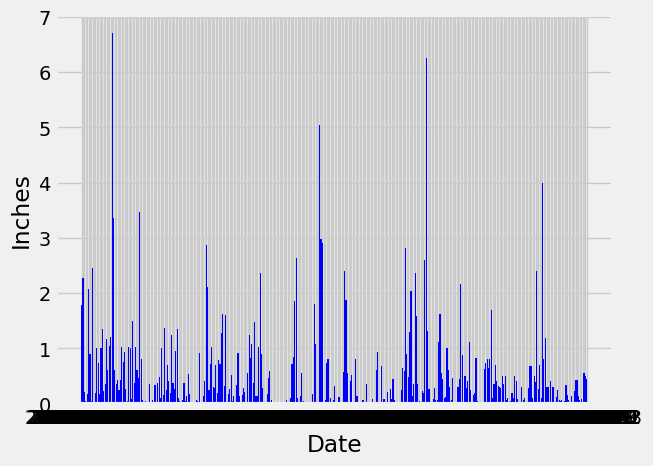

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year)
#for data in results:
   # print(f"{data.date}, {data.prcp}")
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results)
df.columns=["Date", "Precipitation"]

# Sort the dataframe by date
df = df.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = df["Date"]
y_axis = df["Precipitation"]
plt.bar(x_axis, y_axis, color='b', align="center")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()


In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
session.query(station).count()

9

In [60]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.max(measurement.tobs), func.min(measurement.tobs), func.avg(measurement.tobs)).\
     filter(measurement.station == "USC00519281").all()
#, func.sum(measurement.tobs).max(), func.avg(measurement.tobs)).\
# filter(measurement.station == "USC00519281")


[(85.0, 54.0, 71.66378066378067)]

In [70]:
from sqlalchemy import and_

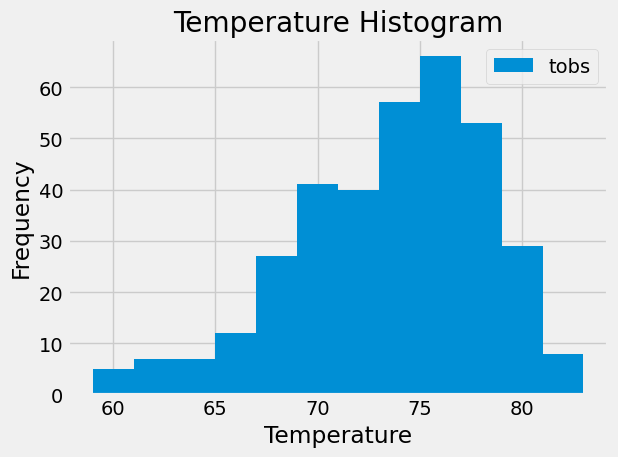

In [90]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

results = session.query(measurement.tobs).\
    filter(and_(measurement.station == 'USC00519281', measurement.date >= previous_year)).all()

#for data in results:
active_station_df = pd.DataFrame(results)

active_station_df.columns=["tobs"]


ax = active_station_df.plot.hist(bins=12)
ax.set_xlabel("Temperature")
ax.set_title("Temperature Histogram")
plt.tight_layout()


# Close Session

In [91]:
# Close Session
session.close()